# **📊 Classification Tasks: Customer Churn Prediction**

This file contains the notebook demo for classification utils script example usages.

# **STAGE 0 : BUSINESS UNDERSTANDING**

## 📌 Problem Statement

A telecommunications company is experiencing significant customer attrition (churn), where existing customers discontinue their services and switch to competitors. The current reactive approach—addressing churn only after customers have already left—has proven costly and ineffective. Customer acquisition costs are typically 5-7x higher than retention costs, making each churned customer a substantial financial loss.

The company's customer service team relies on intuition and basic rules to identify at-risk customers, resulting in missed opportunities to intervene before customers leave. Without a data-driven approach, the company cannot effectively prioritize retention efforts or allocate resources efficiently.

Building on this challenge, the company aims to develop a predictive system that can identify customers at high risk of churning before they leave, enabling proactive retention strategies based on historical customer behavior and service usage patterns.

## 📌 Role

As a Data Scientist Team, our role involves:

- Conducting exploratory data analysis to understand customer behavior patterns
- Identifying key factors that contribute to customer churn
- Building predictive models to flag at-risk customers
- Providing actionable insights for business decision-making

## 📌 Goals

- **Proactive Churn Prevention**: Identify at-risk customers before they churn to enable timely intervention. (_MAIN_)
- **Customer Lifetime Value Optimization**: Focus retention efforts on high-value customers most likely to churn. (_SECONDARY_)
- **Resource Allocation Efficiency**: Prioritize marketing and retention budgets toward customers who need it most. (_SECONDARY_)

## 📌 Business Metrics

| Metric                            | Description                                               | Type        |
| --------------------------------- | --------------------------------------------------------- | ----------- |
| **Churn Rate (%)**                | Percentage of customers who churned in a given period     | _MAIN_      |
| **Customer Retention Rate (%)**   | Percentage of customers retained after intervention       | _MAIN_      |
| **Customer Lifetime Value (CLV)** | Projected revenue from a customer over their relationship | _SECONDARY_ |
| **Cost per Acquisition (CPA)**    | Cost to acquire a new customer vs. retain existing        | _SECONDARY_ |

## 📌 Objectives

The ultimate goal of this project is to create a machine learning model that can:

- Predict customer churn with high recall to minimize missed at-risk customers (false negatives are costly)
- Provide probability scores for churn risk to enable tiered intervention strategies
- Identify the top contributing factors to churn for targeted retention campaigns

## 📌 Success Criteria

- Model achieves **Recall ≥ 80%** for churn class (minimize false negatives)
- Model achieves **Precision ≥ 60%** to avoid excessive false alarms
- Reduction in monthly churn rate by **15-20%** through proactive interventions
- Clear identification of **top 5 churn indicators** for actionable insights

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Project Setup

In [1]:
import os
import sys
from pathlib import Path

# # Add root folder to path (for module imports) --> solved to using hatchling in pyproject.toml
# sys.path.insert(0, str(Path.cwd().parent))

# Change working directory (for I/O operations)
os.chdir(Path.cwd().parent)

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Settings
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

## Data Understanding & Initial Transformation

In [3]:
# Read data from local
df_raw = pd.read_csv('data/classification_data.csv')

# # Read data from github
# df_raw = pd.read_csv('https://raw.githubusercontent.com/mcikalmerdeka/ds-dataprep-utils/refs/heads/main/data/classification_data.csv')

# Create a copy of the dataframe
df = df_raw.copy()

In [4]:
# Check the first few rows of the dataset
df.head()

,customer_id,age,gender,tenure_months,monthly_charges,total_charges,contract_type,payment_method,support_tickets,account_balance,internet_service,online_security,satisfaction_score,days_since_last_login,num_products,referral_source,churn,churn_label
0,CUST_00352,52.0,Female,13.0,64.393115,855.8778833905786,Two year,Bank Transfer,1,58.950305,Fiber optic,True,1.6,6.0,1,Friend,1,Yes
1,CUST_00689,46.0,Male,81.0,115.102595,9029.757263810074,Two year,Electronic Check,1,-25.965241,Fiber optic,Yes,4.5,4.0,4,Billboard,0,No
2,CUST_00485,18.0,Other,44.0,74.210796,3123.9632752803795,One year,Credit Card,4,133.015936,DSL,True,3.0,11.0,4,Email,0,No
3,CUST_00388,54.0,Male,9.0,20.353377,179.8634663715755,One year,Bank Transfer,4,-13.197764,No,Yes,2.6,11.0,1,Google,1,Yes
4,CUST_00031,67.0,Female,0.0,90.937098,0.0,One year,Electronic Check,4,-95.459565,DSL,yes,3.3,63.0,1,Facebook,1,Yes


In [5]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 1050
Number of columns 18


In [6]:
# Check data information
from utils import check_data_information

info_df = check_data_information(df, df.columns.tolist())
display(info_df)

,Feature,Data Type,Null Values,Null Percentage,Zero Values,Zero Percentage,Negative Values,Negative Percentage,Empty Strings,Numeric in Object,Duplicated Values,Unique Values,Cardinality Ratio,Unique Sample
0,customer_id,object,0,0.00,0,0.00,0,0.00,0,0,50,1000,0.9524,"CUST_00352, CUST_00689, CUST_00485, CUST_00388..."
1,age,float64,80,7.62,0,0.00,9,0.86,0,0,50,80,0.0762,"52.0, 46.0, 18.0, 54.0, 67.0"
2,gender,object,0,0.00,0,0.00,0,0.00,0,0,50,5,0.0048,"Female, Male, Other, FEMALE, male"
3,tenure_months,float64,99,9.43,91,8.67,0,0.00,0,0,50,95,0.0905,"13.0, 81.0, 44.0, 9.0, 0.0"
4,monthly_charges,float64,91,8.67,0,0.00,37,3.52,0,0,50,913,0.8695,"64.39311525514046, 115.10259485286996, 74.2107..."
5,total_charges,object,105,10.00,0,0.00,0,0.00,35,891,50,780,0.7429,"855.8778833905786, 9029.757263810074, 3123.963..."
6,contract_type,object,7,0.67,0,0.00,0,0.00,0,0,50,4,0.0038,"Two year, One year, Month-to-month, monthly, nan"
7,payment_method,object,66,6.29,0,0.00,0,0.00,22,0,50,5,0.0048,"Bank Transfer, Electronic Check, Credit Card, ..."
8,support_tickets,int64,0,0.00,144,13.71,0,0.00,0,0,50,8,0.0076,"1, 4, 2, 0, 3"
9,account_balance,float64,0,0.00,0,0.00,527,50.19,0,0,50,1000,0.9524,"58.9503049877248, -25.965240829469444, 133.015..."


In [7]:
# Count total of null values
print(f"Total null values: {df.isnull().sum().sum()}")

Total null values: 648


Feature Information:

| Feature                 | Description                           | Type        | **Specific Data Type** |
| ----------------------- | ------------------------------------- | ----------- | ---------------------- |
| `customer_id`           | Unique customer identifier            | ID          | Nominal                 |
| `age`                   | Customer age                          | Numeric     | Continuous             |
| `gender`                | Customer gender                       | Categorical | Nominal                |
| `tenure_months`         | Months as a customer                  | Numeric     | Discrete               |
| `monthly_charges`       | Monthly billing amount                | Numeric     | Continuous             |
| `total_charges`         | Cumulative charges                    | Numeric     | Continuous             |
| `contract_type`         | Service contract type                 | Categorical | Ordinal                |
| `payment_method`        | Payment method used                   | Categorical | Nominal                |
| `support_tickets`       | Number of support requests            | Numeric     | Discrete               |
| `account_balance`       | Current account balance               | Numeric     | Continuous             |
| `internet_service`      | Type of internet service              | Categorical | Nominal                |
| `online_security`       | Has online security add-on            | Categorical | Nominal                |
| `satisfaction_score`    | Customer satisfaction (1-5)           | Numeric     | Continuous             |
| `days_since_last_login` | Engagement metric                     | Numeric     | Continuous             |
| `num_products`          | Number of products subscribed         | Numeric     | Discrete               |
| `referral_source`       | How customer was acquired             | Categorical | Nominal                |
| **`churn`**             | **Target: Did customer churn? (0/1)** | **Binary**  | Nominal                |

In [31]:
# Group columns by data type
nums_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
cats_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()

target = "churn"
target_label = "churn_label"

In [9]:
# Checking unique values for each categorical columns (for more detail value checking)
for col in cats_cols:
    print()
    unique_vals = df[col].unique()
    if len(unique_vals) > 30:
        print(f"{col}: {unique_vals[:30]} ...")
    else:
        print(f"{col}: {unique_vals}")


customer_id: ['CUST_00352' 'CUST_00689' 'CUST_00485' 'CUST_00388' 'CUST_00031'
 'CUST_00442' 'CUST_00198' 'CUST_00425' 'CUST_00107' 'CUST_00714'
 'CUST_00552' 'CUST_00675' 'CUST_00158' 'CUST_00475' 'CUST_00423'
 'CUST_00656' 'CUST_00617' 'CUST_00483' 'CUST_00884' 'CUST_00650'
 'CUST_00244' 'CUST_00847' 'CUST_00982' 'CUST_00828' 'CUST_00570'
 'CUST_00059' 'CUST_00290' 'CUST_00070' 'CUST_00344' 'CUST_00184'] ...

gender: ['Female' 'Male' 'Other' 'FEMALE' 'male']

total_charges: ['855.8778833905786' '9029.757263810074' '3123.9632752803795'
 '179.8634663715755' '0.0' '3223.3497479774633' '1178.5549395078542'
 '2054.244446922844' nan '649.5617830274659' '1291.6164073707732'
 '169.1788022058472' '1337.695036052829' '835.5272703553898'
 '2700.8463502325053' '9403.674371660214' ' ' '119.86955114435887'
 '1375.0597102996771' '2003.99443775134' '2097.5031921945288'
 '396.26647735650374' '530.6408821814283' '1017.7103432895155'
 '293.05464496323356' '56.321902446339074' '273.5551480649047'
 '799

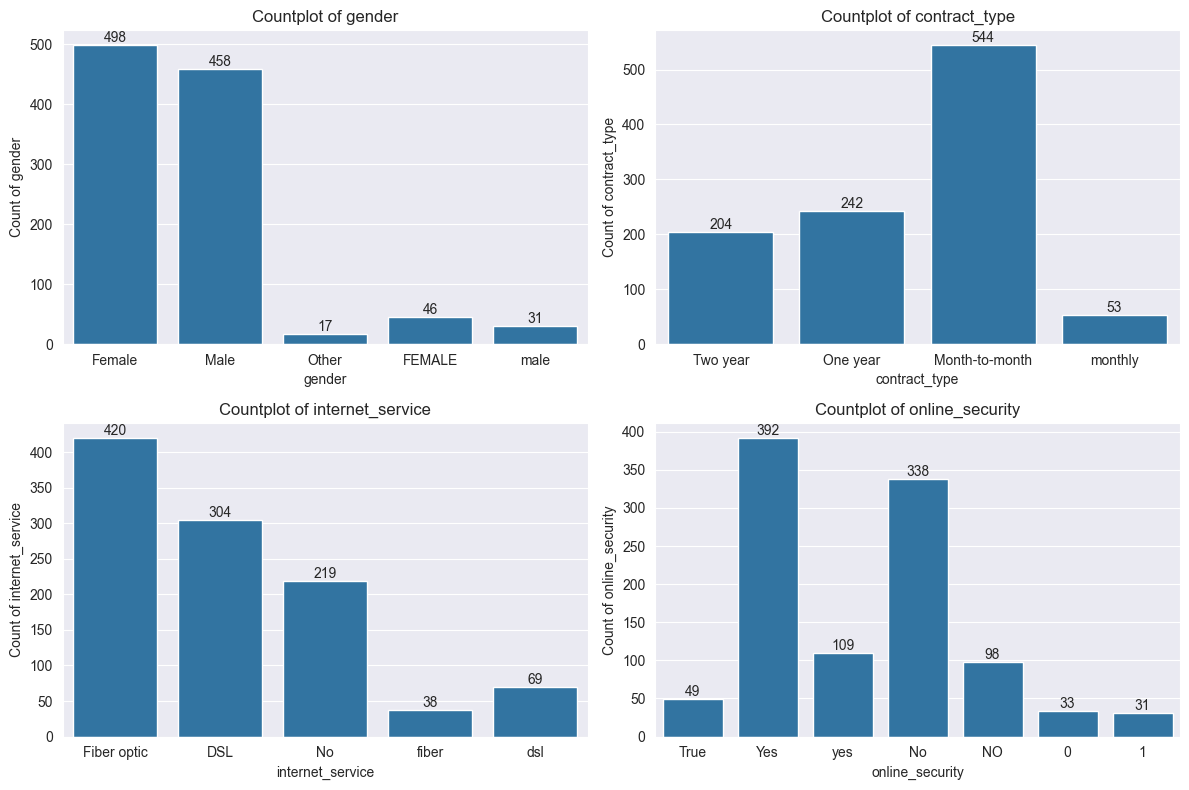

In [10]:
# Quick check on the categorical distribution for problematic columns
columns_to_check = ["gender", "contract_type", "internet_service", "online_security"]

# Using the utils function
from utils import plot_dynamic_countplot
plot_dynamic_countplot(df, columns_to_check, ncols=2, figsize=(12, 8))

In [11]:
# Initial preprocessing of normalizing categorical values

## Handle gender column values
df["gender"] = df["gender"].replace({"FEMALE": "Female", "male": "Male", "Other": "Male"})

## Handle internet_service column values
df["internet_service"] = df["internet_service"].replace({"fiber": "Fiber Optic", "Fiber optic": "Fiber Optic", "dsl": "DSL"})

## Handle contract_type column values
df["contract_type"] = df["contract_type"].replace({"Month-to-month": "Monthly", "monthly": "Monthly", "one_year": "Yearly", "two_year": "Yearly"})

## Handle online_Security column values
df["online_security"] = df["online_security"].replace(
    {"True": "Yes", "yes": "Yes", "NO": "No", "no": "No", "0": "No", "1": "Yes"})

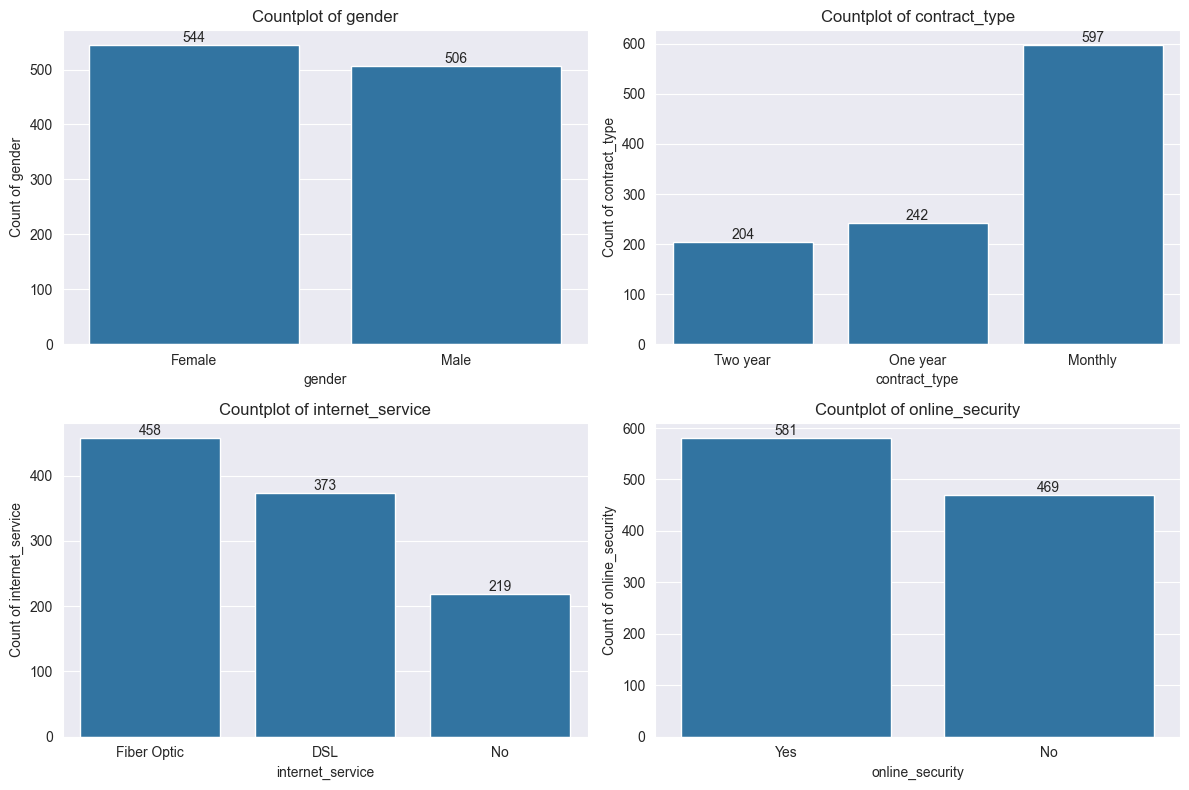

In [12]:
# Re-check after transformation
plot_dynamic_countplot(df, columns_to_check, ncols=2, figsize=(12, 8))

In [13]:
# Initial data preprocessing of string values in an numerical column

## First, let's identify the types of values in total_charges
print("Unique value types in total_charges:")
print(df["total_charges"].value_counts())
print(f"\nData type: {df['total_charges'].dtype}")

## Check for non-numeric values
def is_numeric(val):
    try:
        float(val)
        return True
    except (ValueError, TypeError):
        return False

non_numeric_mask = ~df["total_charges"].apply(is_numeric)
print(f"\nNumber of non-numeric values: {non_numeric_mask.sum()}")
print("\nNon-numeric values found:")
print(df.loc[non_numeric_mask, "total_charges"].value_counts())

## Handle the non-numeric values
# Replace empty strings and whitespace with NaN
df["total_charges"] = df["total_charges"].replace(r'^\s*$', np.nan, regex=True)

# Replace 'Pending' or similar text values with NaN
df["total_charges"] = df["total_charges"].replace(['Pending', 'pending', 'PENDING'], np.nan)

# Convert to numeric, coercing errors to NaN
df["total_charges"] = pd.to_numeric(df["total_charges"], errors='coerce')

print(f"\nAfter conversion:")
print(f"Data type: {df['total_charges'].dtype}")
print(f"Null values: {df['total_charges'].isnull().sum()}")
print(f"Valid numeric values: {df['total_charges'].notna().sum()}")

Unique value types in total_charges:
total_charges
0.0                   76
                      19
Pending               19
                      16
693.6204866570193      2
                      ..
147.63658790689672     1
1191.0371604943653     1
126.84723256866658     1
1582.824397863934      1
6511.9168552485635     1
Name: count, Length: 780, dtype: int64

Data type: object

Number of non-numeric values: 54

Non-numeric values found:
total_charges
           19
Pending    19
           16
Name: count, dtype: int64

After conversion:
Data type: float64
Null values: 159
Valid numeric values: 891


In [14]:
# Initial data preprocessing of drop duplicates and null values
from utils import handle_missing_values 

## Drop duplicated values
df = df.drop_duplicates()

## Drop null values
null_cols = df.columns[df.isnull().any()].tolist()
df, _ = handle_missing_values(
    data=df,
    strategy="remove",
    columns=null_cols,
)

In [15]:
# Check the dataset shape after initial cleaning
print(f'Dataset shape after initial cleaning: {df.shape}')
print(f'\nTarget distribution:')
print(df['churn'].value_counts(normalize=True))

Dataset shape after initial cleaning: (513, 18)

Target distribution:
churn
0    0.594542
1    0.405458
Name: proportion, dtype: float64


In [24]:
# Check data information
from utils import check_data_information

info_df = check_data_information(df, df.columns.tolist())
display(info_df)

,Feature,Data Type,Null Values,Null Percentage,Zero Values,Zero Percentage,Negative Values,Negative Percentage,Empty Strings,Numeric in Object,Duplicated Values,Unique Values,Cardinality Ratio,Unique Sample
0,customer_id,object,0,0.0,0,0.00,0,0.00,0,0,0,513,1.0000,"CUST_00352, CUST_00689, CUST_00485, CUST_00388..."
1,age,float64,0,0.0,0,0.00,4,0.78,0,0,0,70,0.1365,"52.0, 46.0, 18.0, 54.0, 67.0"
2,gender,object,0,0.0,0,0.00,0,0.00,0,0,0,2,0.0039,"Female, Male"
3,tenure_months,float64,0,0.0,45,8.77,0,0.00,0,0,0,82,0.1598,"13.0, 81.0, 44.0, 9.0, 0.0"
4,monthly_charges,float64,0,0.0,0,0.00,20,3.90,0,0,0,513,1.0000,"64.39311525514046, 115.10259485286996, 74.2107..."
5,total_charges,float64,0,0.0,45,8.77,5,0.97,0,0,0,469,0.9142,"855.8778833905786, 9029.757263810074, 3123.963..."
6,contract_type,object,0,0.0,0,0.00,0,0.00,0,0,0,3,0.0058,"Two year, One year, Monthly"
7,payment_method,object,0,0.0,0,0.00,0,0.00,14,0,0,5,0.0097,"Bank Transfer, Electronic Check, Credit Card, ..."
8,support_tickets,int64,0,0.0,68,13.26,0,0.00,0,0,0,8,0.0156,"1, 4, 0, 3, 2"
9,account_balance,float64,0,0.0,0,0.00,254,49.51,0,0,0,513,1.0000,"58.9503049877248, -25.965240829469444, 133.015..."


In [ ]:
# Handling for data with negative account balance 
df[df["account_balance"] < 0]

,customer_id,age,gender,tenure_months,monthly_charges,total_charges,contract_type,payment_method,support_tickets,account_balance,internet_service,online_security,satisfaction_score,days_since_last_login,num_products,referral_source,churn,churn_label
1,CUST_00689,46.0,Male,81.0,115.102595,9029.757264,Two year,Electronic Check,1,-25.965241,Fiber Optic,Yes,4.5,4.0,4,Billboard,0,No
3,CUST_00388,54.0,Male,9.0,20.353377,179.863466,One year,Bank Transfer,4,-13.197764,No,Yes,2.6,11.0,1,Google,1,Yes
4,CUST_00031,67.0,Female,0.0,90.937098,0.000000,One year,Electronic Check,4,-95.459565,DSL,Yes,3.3,63.0,1,Facebook,1,Yes
6,CUST_00198,40.0,Female,17.0,69.056825,1178.554940,Monthly,Electronic Check,0,-64.114663,Fiber Optic,No,3.2,17.0,3,Billboard,1,Yes
9,CUST_00714,39.0,Male,19.0,34.543776,649.561783,Monthly,Credit Card,0,-15.404003,Fiber Optic,Yes,1.0,24.0,1,Instagram,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,CUST_00975,18.0,Male,0.0,109.359512,0.000000,Two year,Credit Card,1,-27.842948,Fiber Optic,Yes,4.0,1.0,1,Email,0,No
1028,CUST_00699,37.0,Female,0.0,37.740628,0.000000,One year,Electronic Check,3,-3.235275,No,No,3.3,20.0,1,Friend,1,Yes
1030,CUST_00474,64.0,Female,1.0,31.920085,32.215914,One year,Electronic Check,3,-52.285259,No,Yes,2.3,0.0,1,Twitter,1,Yes
1038,CUST_00385,42.0,Female,43.0,108.170605,4836.054739,Monthly,Mailed Check,4,-200.954006,DSL,No,1.9,1.0,2,Facebook,1,Yes


## Univariate Analysis

**Purpose:** Understand distributions and basic statistics of features before splitting.

### Numerical Features

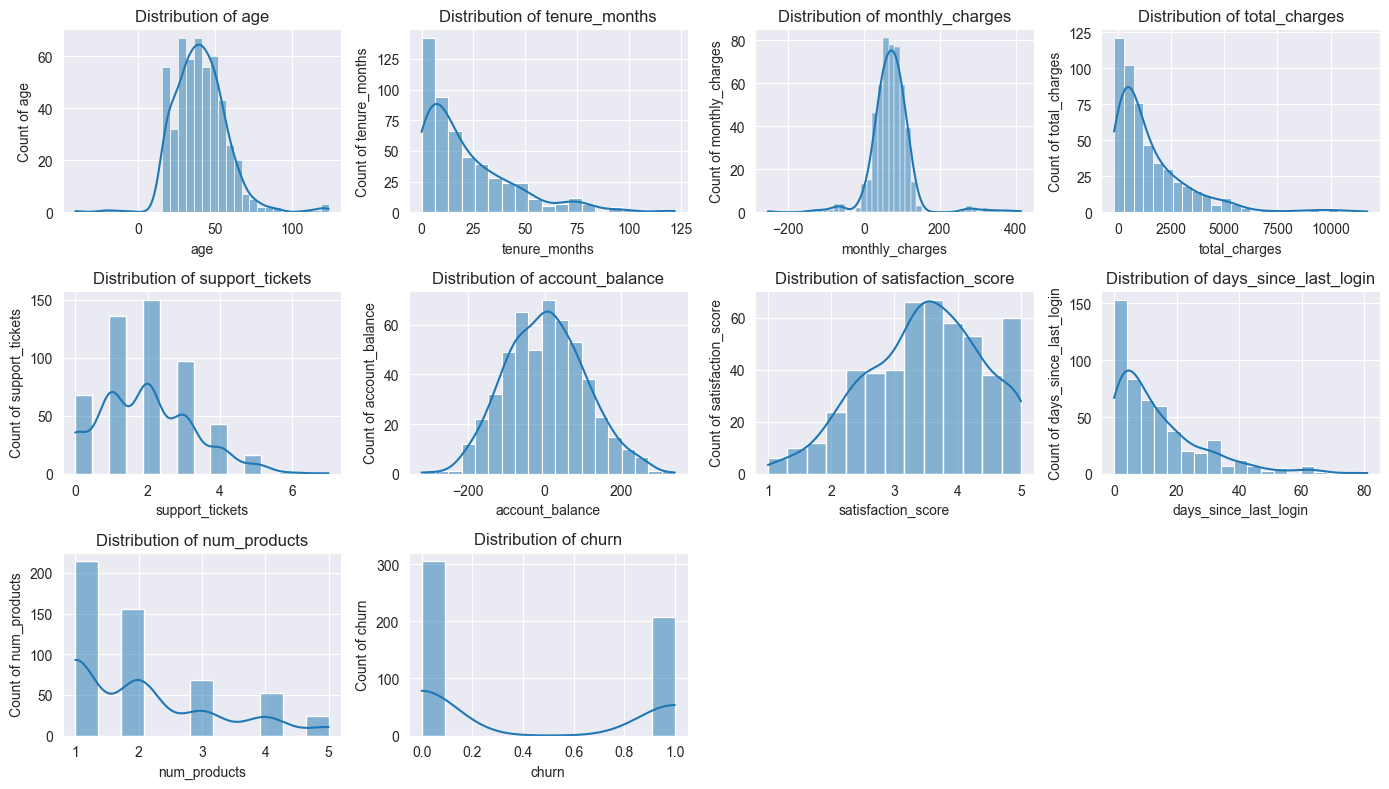

,Feature,overall_count,overall_mean,overall_std,overall_min,overall_25%,overall_50%,overall_75%,overall_max,overall_range,overall_IQR,overall_CV,overall_skewness,overall_kurtosis
0,age,513.0,40.377198,17.267566,-41.092743,29.000000,40.000000,50.000000,123.694732,164.787475,21.000000,42.765638,0.725719,4.325863
1,tenure_months,513.0,21.968811,22.437130,0.000000,6.000000,14.000000,32.000000,122.000000,122.000000,26.000000,102.131746,1.559877,2.534883
2,monthly_charges,513.0,72.753499,58.343311,-253.108889,48.111926,71.567755,95.259511,414.634142,667.743031,47.147585,80.193134,1.265036,11.059446
3,total_charges,513.0,1551.739608,1877.835854,-181.485933,308.282229,873.397674,2142.744758,11731.806760,11913.292694,1834.462529,121.014882,2.318865,6.890340
4,support_tickets,513.0,1.945419,1.308380,0.000000,1.000000,2.000000,3.000000,7.000000,7.000000,2.000000,67.254415,0.514646,0.041830
5,account_balance,513.0,3.628012,104.245319,-321.605720,-68.813706,1.318026,72.127813,339.812732,661.418452,140.941519,2873.345113,0.163430,-0.111730
6,satisfaction_score,513.0,3.489084,0.917664,1.000000,2.800000,3.500000,4.100000,5.000000,4.000000,1.300000,26.301001,-0.288938,-0.471549
7,days_since_last_login,513.0,14.216374,14.479847,0.000000,3.000000,9.000000,21.000000,81.000000,81.000000,18.000000,101.853308,1.648785,2.978027
8,num_products,513.0,2.058480,1.172808,1.000000,1.000000,2.000000,3.000000,5.000000,4.000000,2.000000,56.974503,0.962680,-0.044095
9,churn,513.0,0.405458,0.491460,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,121.210978,0.385115,-1.851687


In [35]:
# Checking the distribution and statistical summary of the numerical values
from utils import plot_dynamic_hisplots_kdeplots, describe_numerical_combined
plot_dynamic_hisplots_kdeplots(df=df, col_series=nums_cols, ncols=4, figsize=(14, 8))

# Display the overall statistics for numerical columns
numerical_summary = describe_numerical_combined(df, nums_cols)
display(numerical_summary)

### Categorical Features

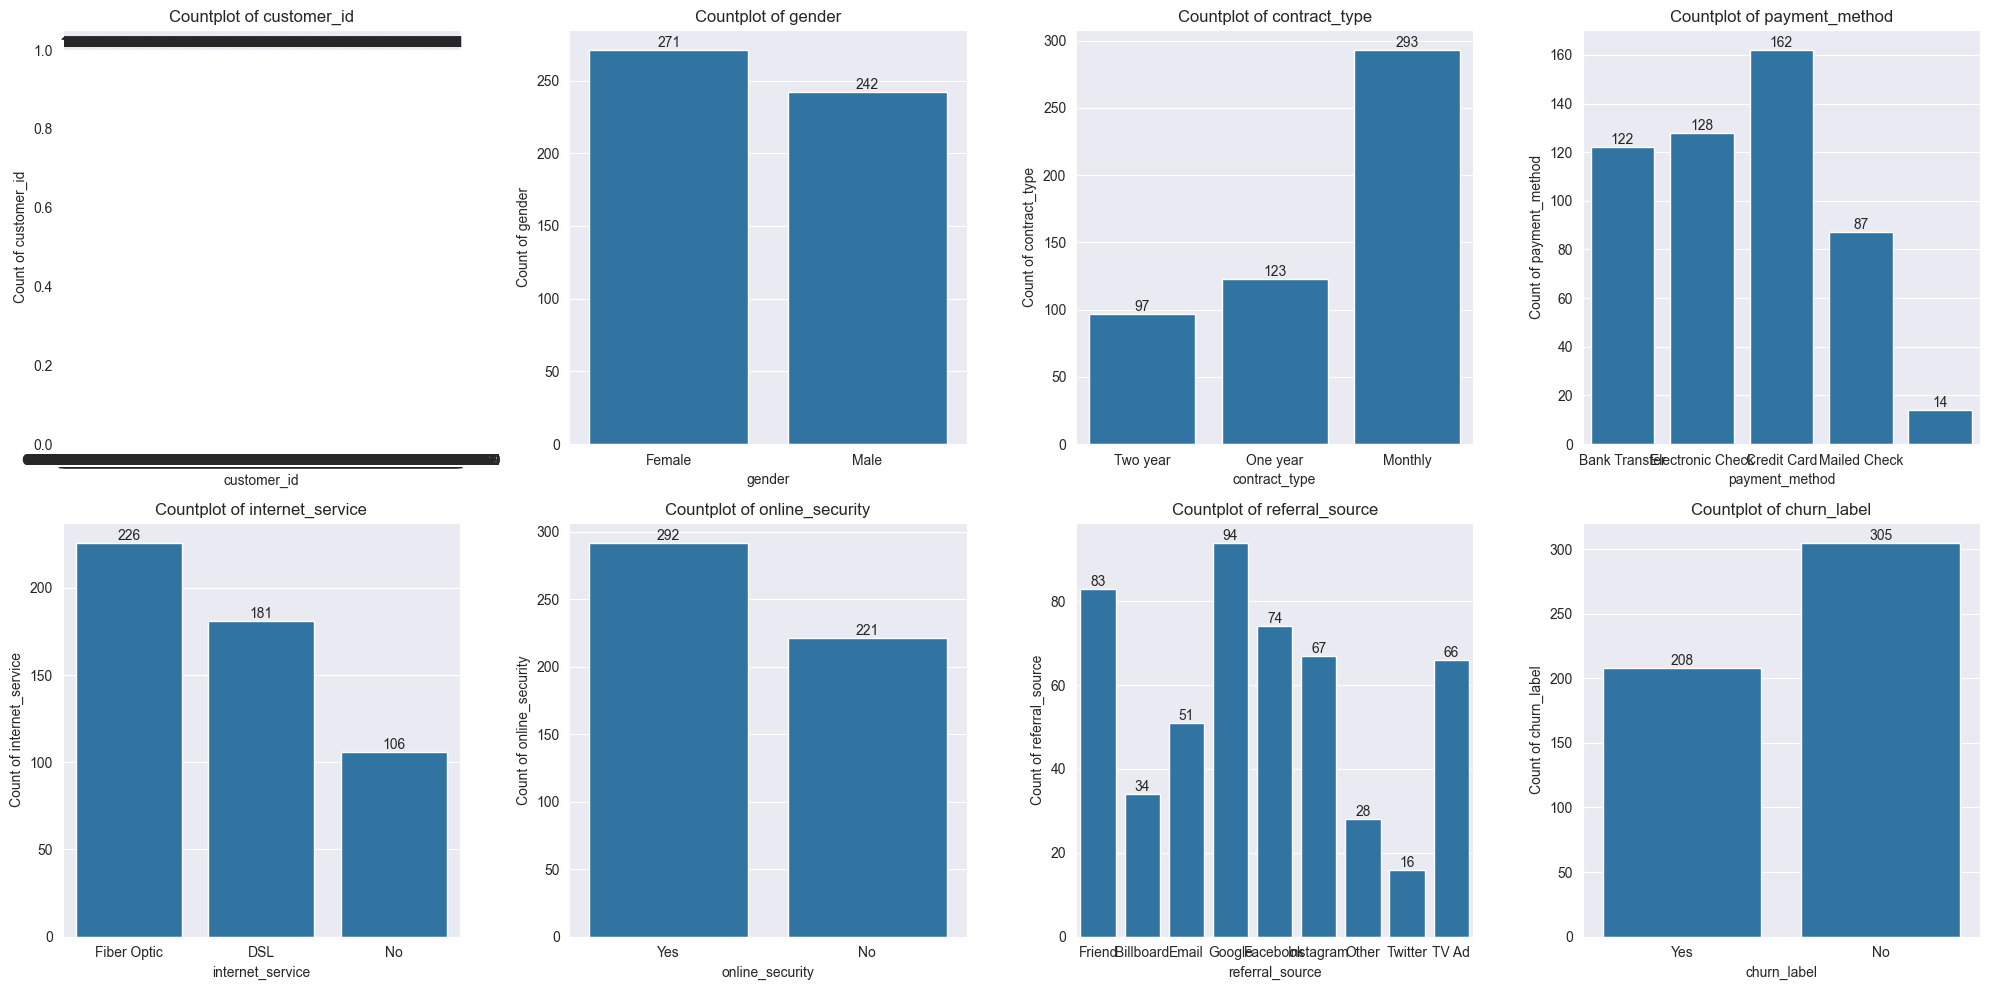

,Feature,overall_count,overall_unique,overall_top,overall_freq,overall_bottom,overall_freq_bottom,overall_top_percentage,overall_bottom_percentage,overall_n_categories
0,customer_id,513,513,CUST_00352,1,CUST_00352,1,0.19,0.19,513
1,gender,513,2,Female,271,Male,242,52.83,47.17,2
2,contract_type,513,3,Monthly,293,Two year,97,57.12,18.91,3
3,payment_method,513,5,Credit Card,162,,14,31.58,2.73,5
4,internet_service,513,3,Fiber Optic,226,No,106,44.05,20.66,3
5,online_security,513,2,Yes,292,No,221,56.92,43.08,2
6,referral_source,513,9,Google,94,Twitter,16,18.32,3.12,9
7,churn_label,513,2,No,305,Yes,208,59.45,40.55,2


In [36]:
# Checking the distribution and statistical summary of the categorical values
from utils import describe_categorical_combined, plot_dynamic_countplot

# Countplot function implementation
plot_dynamic_countplot(df=df, col_series=cats_cols, ncols=4, figsize=(20, 10))

# Display the overall statistics for categorical columns
categorical_summary = describe_categorical_combined(df, cats_cols)
display(categorical_summary)


Chi-Square Analysis Results:
--------------------------------------------------------------------------------


,Feature,Chi-Square,P-Value,Cramér's V,Effect Size,Is Significant,Strongest Category,Association Direction
0,customer_id,513.000000,0.479240,1.000000,Large,False,CUST_00005,Positive
6,referral_source,6.031361,0.643719,0.108430,Small,False,Facebook,Positive
3,payment_method,2.588691,0.628828,0.071036,Negligible,False,Mailed Check,Positive
4,internet_service,2.173186,0.337364,0.065086,Negligible,False,DSL,Positive
1,gender,1.025202,0.311288,0.044704,Negligible,False,Male,Negative
5,online_security,0.499980,0.479509,0.031219,Negligible,False,No,Positive
2,contract_type,0.203293,0.903349,0.019907,Negligible,False,One year,Positive


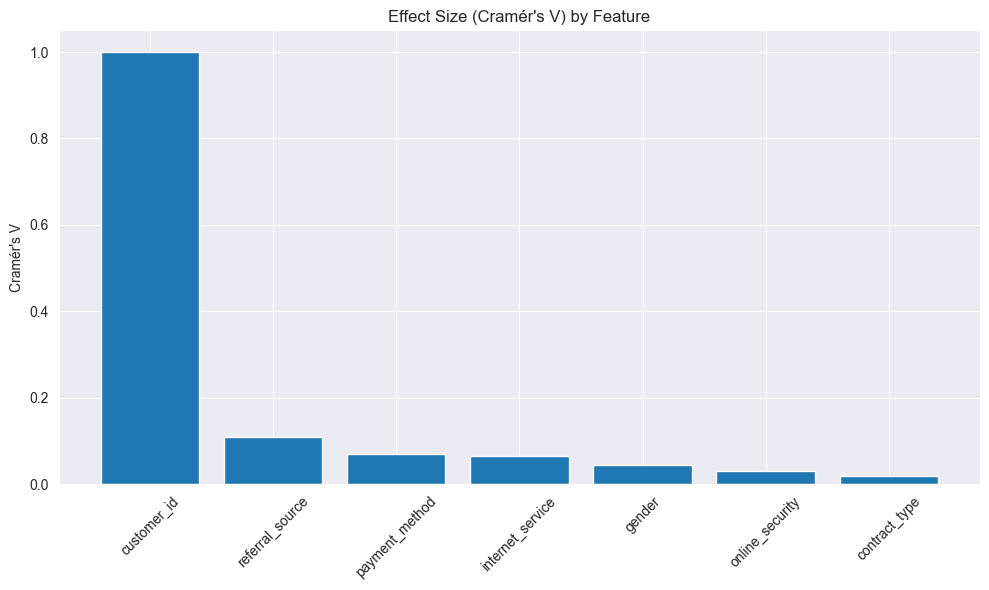

In [ ]:
# Categorical features correlation analysis
from utils import analyze_categorical_relationships

# Analyze relationships between categorical features and target
results = analyze_categorical_relationships(df, features=[col for col in cats_cols if col != "churn_label"], target=target_label, alpha=0.05)

## Bivariate/Multivariate Analysis

<Figure size 1500x1500 with 0 Axes>

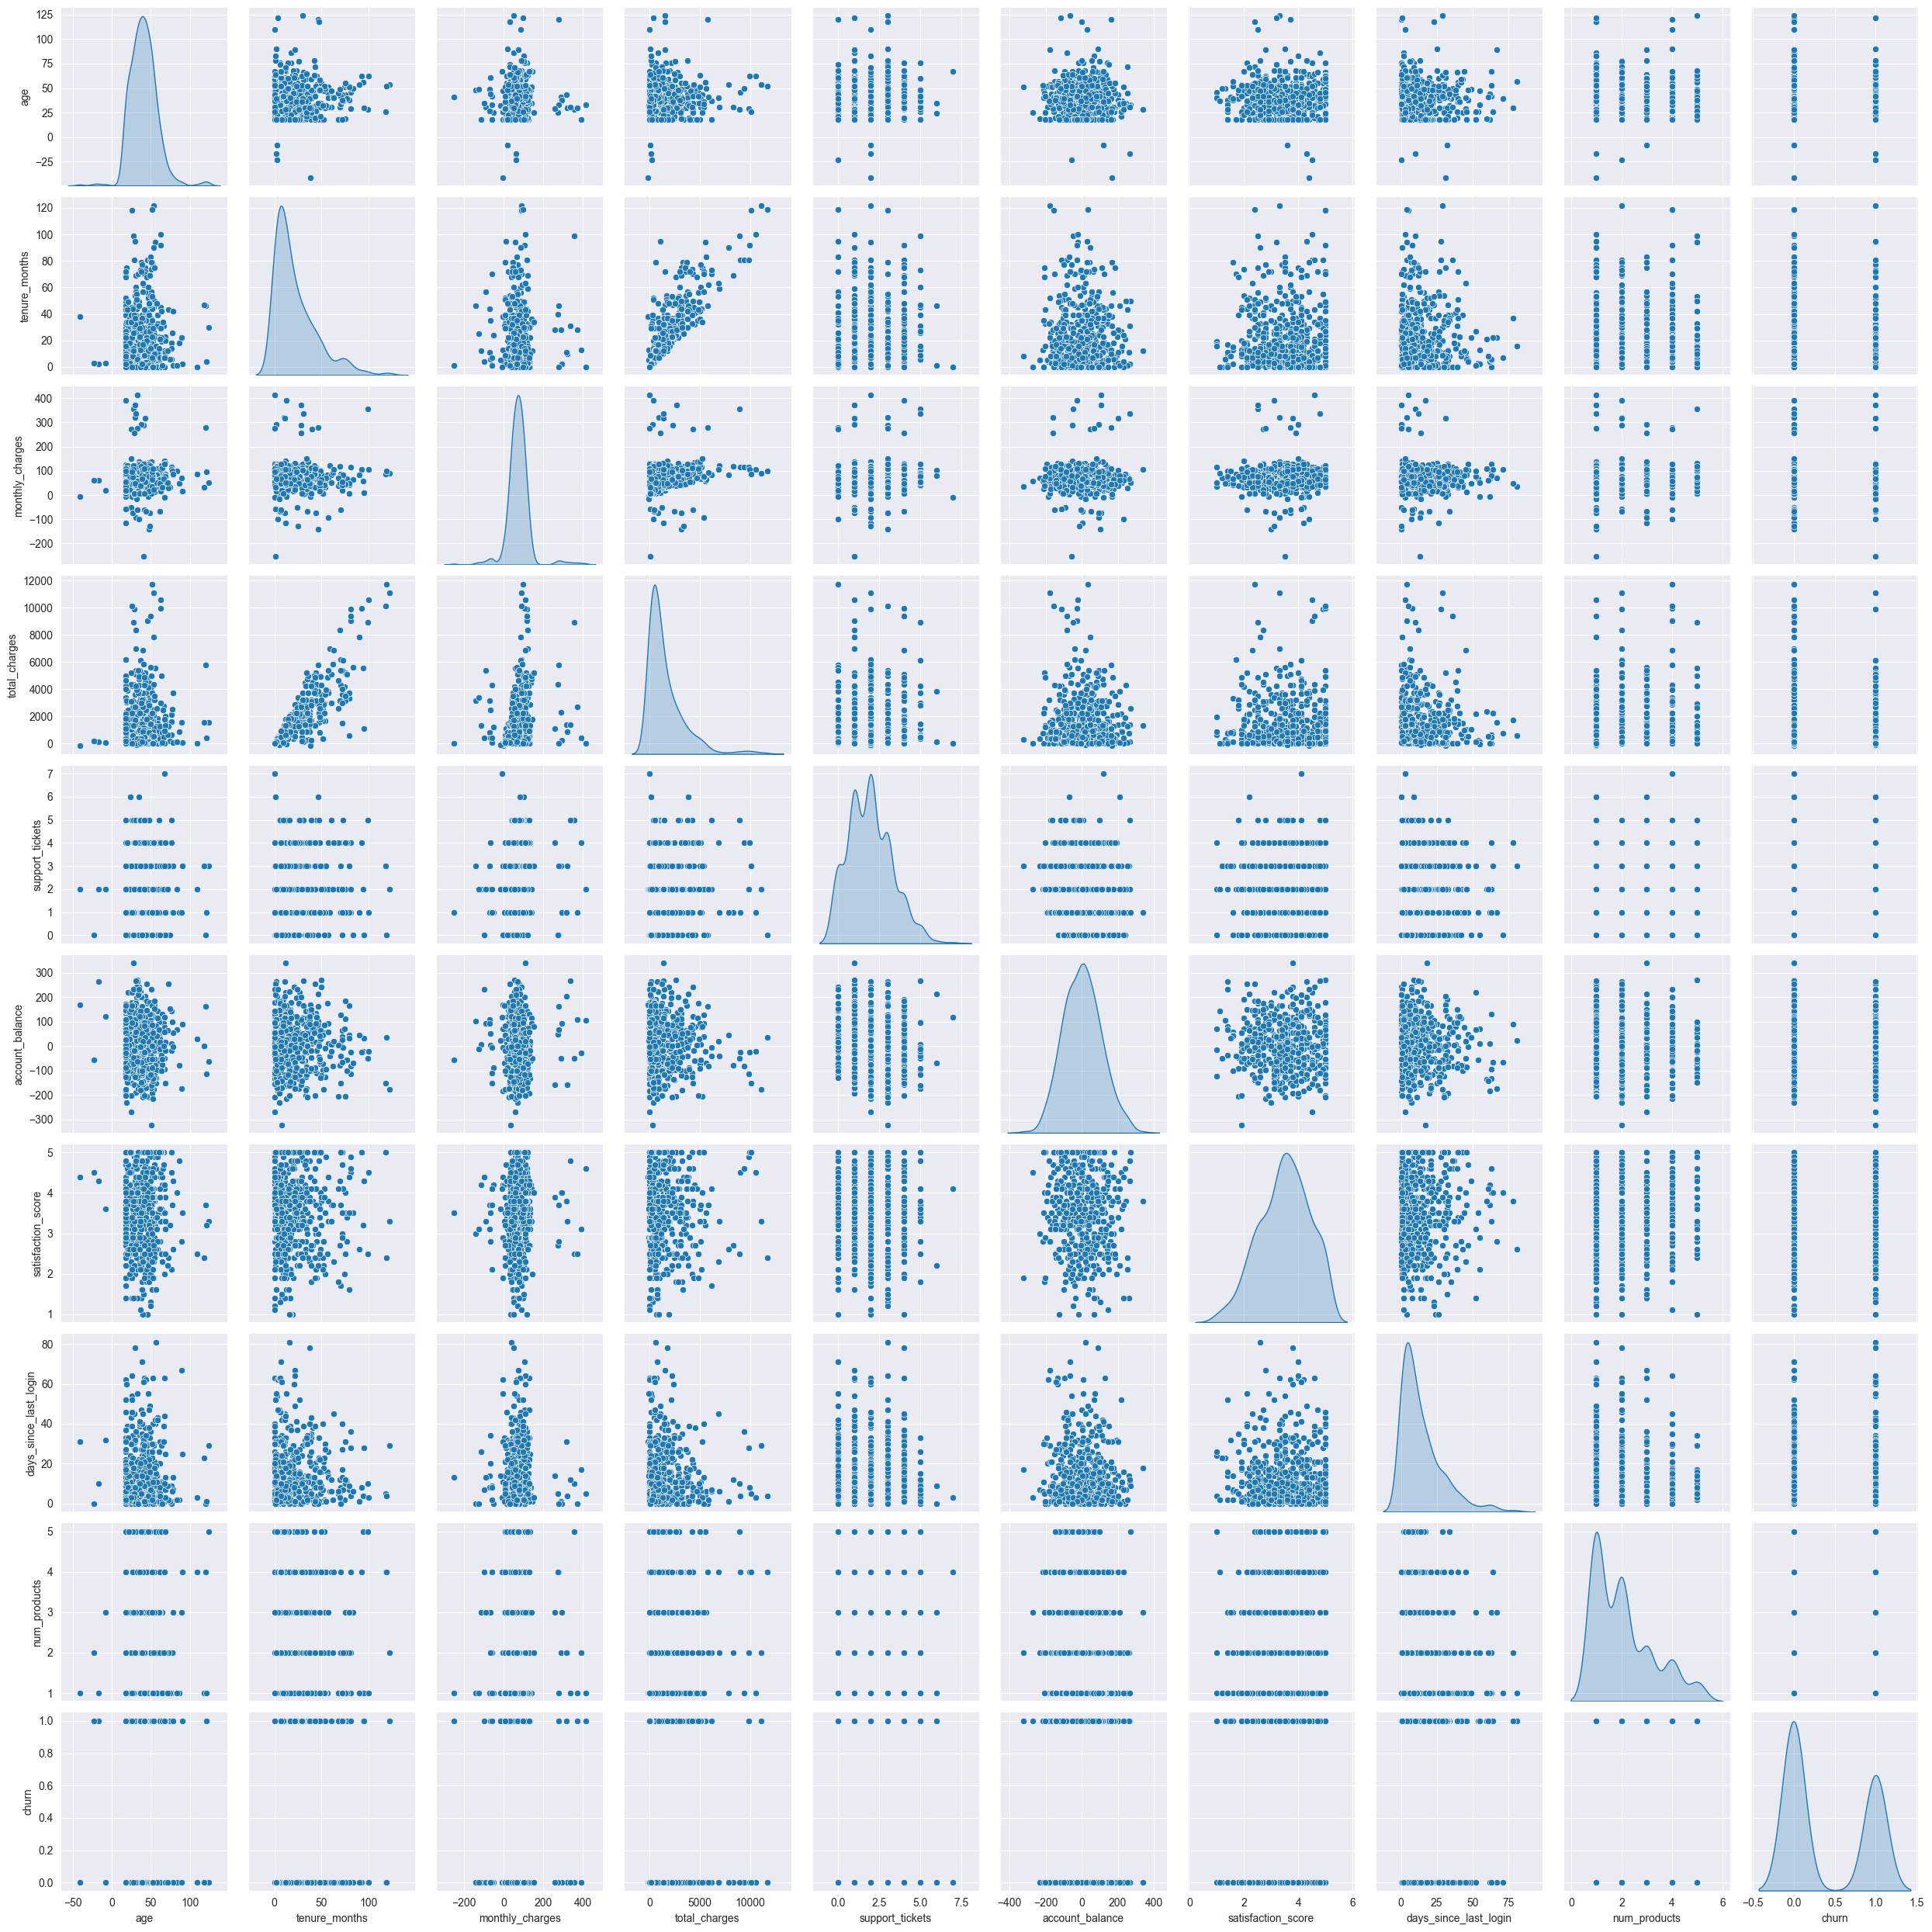

In [40]:
# Checking pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(data=df, diag_kind='kde')
plt.tight_layout()
plt.show()

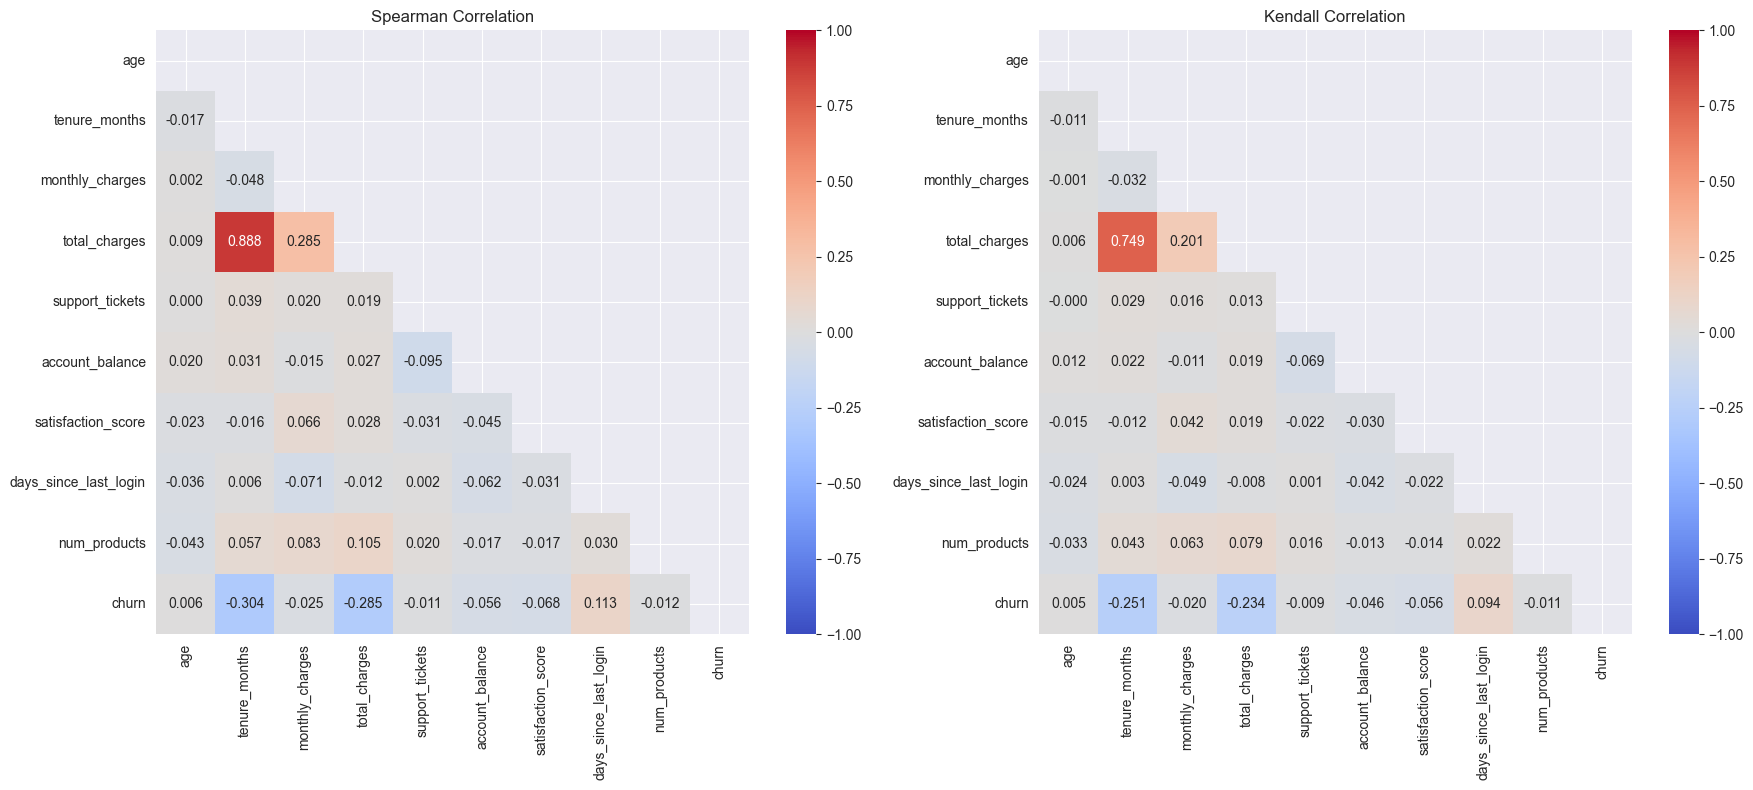

In [41]:
# Correlation heatmap of numerical features and target
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

# Plot correlation heatmap with Spearman method
sns.heatmap(data=df.corr(method='spearman', numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[0])
ax[0].set_title('Spearman Correlation')

# Plot correlation heatmap with Kendall method
sns.heatmap(data=df.corr(method='kendall', numeric_only=True), mask=mask, cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title('Kendall Correlation')

plt.tight_layout()
plt.show()

# **STAGE 2: DATA SPLITTING (CRITICAL STEP)**

**Splitting BEFORE preprocessing prevents data leakage:**

1. **Outlier Removal:** If we calculate IQR on full dataset, test set statistics influence training decisions
2. **Feature Encoding:** Category frequencies from test set shouldn't inform training
3. **Feature Selection:** Correlation/importance scores using test data = cheating
4. **Scaling:** Already doing this correctly, but must come after split

**Principle:** Test set should be completely unseen until final evaluation. It should simulate future data where we don't know the answers.

## Split Strategy: 75% Train, 20% Validation, 5% Test

- **Training (75%):** Fit all preprocessing steps and train models
- **Validation (20%):** Tune hyperparameters and select best model
- **Test (5%):** Final evaluation only, never touched during development

**Note:** For classification, we stratify by the target variable (`churn`) to ensure representative distribution of both classes across all splits.

In [ ]:
# Define target and features
target = 'churn'

# Drop customer_id and churn_label (redundant with churn target)
cols_to_drop = ['customer_id', 'churn_label']

# Separate features and target
X_raw = df.drop(columns=[target] + cols_to_drop)
y_raw = df[target]

# First split: 75% train, 25% temp (which will become val + test)
X_train_raw, X_temp_raw, y_train_raw, y_temp_raw = train_test_split(
    X_raw, y_raw, 
    test_size=0.25, 
    random_state=42,
    stratify=y_raw  # Stratify by target for classification
)

# Second split: Split temp into 80% validation (20% of original) and 20% test (5% of original)
X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(
    X_temp_raw, y_temp_raw, 
    test_size=0.2, 
    random_state=42,
    stratify=y_temp_raw  # Stratify by target for classification
)

# Display split sizes
total_samples = len(X_raw)
print(f"Total samples: {total_samples:,}")
print(f"\nTraining set: {len(X_train_raw):,} samples ({len(X_train_raw)/total_samples*100:.1f}%)")
print(f"Validation set: {len(X_val_raw):,} samples ({len(X_val_raw)/total_samples*100:.1f}%)")
print(f"Test set: {len(X_test_raw):,} samples ({len(X_test_raw)/total_samples*100:.1f}%)")

# Check target distribution across splits
print(f"\nTarget distribution in Training set:")
print(y_train_raw.value_counts(normalize=True))
print(f"\nTarget distribution in Validation set:")
print(y_val_raw.value_counts(normalize=True))
print(f"\nTarget distribution in Test set:")
print(y_test_raw.value_counts(normalize=True))

# **STAGE 3: DATA PREPROCESSING (TRAIN + VAL ONLY)**

From this point forward:
- All preprocessing is **fitted on training data only**
- Validation and test sets are **transformed** using training statistics
- We never look at test set until final evaluation

## Outlier Detection and Removal

**Why after split?** IQR thresholds calculated from training data only. If we used full dataset, test set extreme values would influence what we consider "outliers" in training.

In [ ]:
# Define numerical columns for outlier detection
numerical_features = ['age', 'tenure_months', 'monthly_charges', 'total_charges', 
                     'support_tickets', 'account_balance', 'satisfaction_score', 
                     'days_since_last_login', 'num_products']

# Combine train features and target for outlier detection
df_train = pd.concat([X_train_raw, y_train_raw], axis=1)

# Check outliers on TRAINING data only
summary = filter_outliers(df_train, columns=numerical_features, threshold=1.5, detect_only=True)
display(summary)

# Visualize outliers in training data
plot_dynamic_boxplots_violinplots(df_train, numerical_features, plot_type="boxplot", ncols=4, orientation="v", figsize=(14, 12))

In [ ]:
# Remove outliers from TRAINING data and get IQR limits
# These limits will be applied to validation data to ensure consistent distributions

# Step 1: Get IQR limits from training data
train_outlier_summary = filter_outliers(df_train, columns=numerical_features, method='iqr', threshold=1.5, detect_only=True, verbose=False)

# Step 2: Remove outliers from training data
df_train_clean = filter_outliers(df_train, columns=numerical_features, method='iqr', threshold=1.5, detect_only=False)
X_train_clean = df_train_clean.drop(columns=[target])
y_train_clean = df_train_clean[target]

# Step 3: Apply SAME IQR limits to validation data
def filter_using_training_limits(data, columns, limits_df):
    """
    Filter outliers using pre-computed IQR limits from training data.
    This prevents data leakage while ensuring consistent distributions.
    """
    mask = pd.Series([True] * len(data), index=data.index)
    
    for _, row in limits_df.iterrows():
        col = row['Column Name']
        if col in columns and col in data.columns:
            lower = row['Lower Limit']
            upper = row['Upper Limit']
            col_mask = (data[col] >= lower) & (data[col] <= upper)
            mask = mask & col_mask
    
    return data[mask]

# Combine validation features and target for filtering
df_val = pd.concat([X_val_raw, y_val_raw], axis=1)
df_val_clean = filter_using_training_limits(df_val, numerical_features, train_outlier_summary)

# Split back into X and y
X_val_clean = df_val_clean.drop(columns=[target])
y_val_clean = df_val_clean[target]

print(f"Training samples after outlier removal: {len(X_train_clean):,}")
print(f"Removed {len(X_train_raw) - len(X_train_clean):,} outlier samples from training set")
print(f"\nValidation samples after applying training limits: {len(X_val_clean):,}")
print(f"Removed {len(X_val_raw) - len(X_val_clean):,} outlier samples from validation set")
print(f"\nTest set: {len(X_test_raw):,} (unchanged - for final evaluation only)")

## Feature Encoding

**Why after split?** 
- Ordinal encoding order is a modeling decision
- One-hot encoding creates categories based on unique values - test set categories shouldn't influence this
- We fit encoders on training data, then apply to val/test

**Encoding Strategy:**
- **Binary Encoding**: For binary features (gender, online_security, etc.)
- **Ordinal Encoding**: For ordered categories (contract_type)
- **One-Hot Encoding**: For nominal categories with low cardinality (internet_service, payment_method, referral_source)

In [ ]:
# Define encoding strategy
ordinal_cols = ["contract_type"]
ordinal_categories = {
    "contract_type": ["Monthly", "One year", "Two year"]  # Ordered by commitment length
}

nominal_cols = ["internet_service", "payment_method", "referral_source"]

# Binary columns - will be handled separately
binary_cols = ["gender", "online_security"]

# FIT encoders on TRAINING data only
X_train_encoded, encoders = feature_encoding(
    data=X_train_clean.copy(),
    ordinal_columns=ordinal_cols,
    nominal_columns=nominal_cols,
    ordinal_categories=ordinal_categories,
    handle_unknown='ignore'
)

# Encode validation data - TRANSFORM using fitted encoders
X_val_encoded, _ = feature_encoding(
    data=X_val_clean.copy(),
    ordinal_columns=ordinal_cols,
    nominal_columns=nominal_cols,
    ordinal_categories=ordinal_categories,
    encoders=encoders,
    handle_unknown='ignore'
)

# Encode test data - TRANSFORM using fitted encoders
X_test_encoded, _ = feature_encoding(
    data=X_test_raw.copy(),
    ordinal_columns=ordinal_cols,
    nominal_columns=nominal_cols,
    ordinal_categories=ordinal_categories,
    encoders=encoders,
    handle_unknown='ignore'
)

# Handle binary columns manually
for col in binary_cols:
    if col in X_train_encoded.columns:
        # Map binary values
        binary_map = {'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0}
        X_train_encoded[col] = X_train_encoded[col].map(binary_map).fillna(0).astype(int)
        X_val_encoded[col] = X_val_encoded[col].map(binary_map).fillna(0).astype(int)
        X_test_encoded[col] = X_test_encoded[col].map(binary_map).fillna(0).astype(int)

print(f"Encoded features shape: {X_train_encoded.shape}")
print(f"\nFeature columns after encoding:")
print(X_train_encoded.columns.tolist())

## Feature Selection

**Why after split?** 
- Correlation analysis using test data = data leakage
- Feature importance scores should only reflect training data patterns
- Selected features must be based on train set only

In [ ]:
# Combine train data for correlation analysis
df_train_encoded = pd.concat([X_train_encoded, y_train_clean.reset_index(drop=True)], axis=1)

# Calculate correlation on TRAINING data only
feature_feature_df, feature_target_df = calculate_correlation_tabular(
    df_train_encoded, 
    target_col=target, 
    method='spearman', 
    corr_type='both'
)

print("Correlation Between Features:")
display(feature_feature_df.head(10))

print("\nCorrelation of Features to Target:")
display(feature_target_df.head(10))

In [ ]:
# Calculate feature importance using TRAINING data only
feature_importance_f = calculate_feature_importance(
    X=X_train_encoded, 
    y=y_train_clean.reset_index(drop=True), 
    task='classification', 
    method='f_classif', 
    k='all'
)

print("Feature importance (F-classif, top 15):")
display(feature_importance_f.iloc[:15].reset_index(drop=True))

In [ ]:
# Calculate mutual information on TRAINING data only
feature_importance_mi = calculate_feature_importance(
    X=X_train_encoded, 
    y=y_train_clean.reset_index(drop=True), 
    task='classification', 
    method='mutual_info', 
    k='all'
)

print("Feature importance (Mutual Info, top 15):")
display(feature_importance_mi.iloc[:15].reset_index(drop=True))

## Feature Scaling

**Why after split?** Scaler parameters (mean, std) calculated from training data only.

In [ ]:
# FIT scaler on TRAINING data only
X_train_scaled, scaler = feature_scaling(
    data=X_train_encoded.copy(),
    columns=X_train_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist(),
    method='standard'
)

# TRANSFORM validation data using fitted scaler
X_val_scaled, _ = feature_scaling(
    data=X_val_encoded.copy(),
    columns=X_val_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist(),
    method='standard',
    scaler=scaler
)

# TRANSFORM test data using fitted scaler
X_test_scaled, _ = feature_scaling(
    data=X_test_encoded.copy(),
    columns=X_test_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist(),
    method='standard',
    scaler=scaler
)

print(f"Scaled features shape: {X_train_scaled.shape}")
print(f"\nTraining set: {X_train_scaled.shape}")
print(f"Validation set: {X_val_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")

# **STAGE 4 : MODELLING AND EVALUATION**

In [ ]:
# Model training and evaluation will go here
# Using eval_classification, compare_cv_metrics, and other ML utils

# **STAGE 5 : Business Impact Simulation**

In [ ]:
# Business impact analysis and ROI calculations will go here